# Platform Positioning

In [1]:
from __future__ import print_function

In [2]:
import random as random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from sklearn.metrics import euclidean_distances

## Get Target Test Data

In [3]:
import geopandas as gpd
import pickle
with open('data/0_raw/TEST_TRIN_20191111', 'rb') as f:
    df_target = pickle.load(f)
    
df_target.head()    

,target_id,target_name,geom_text_zm,geom_binary_zm,geom_STAs_binary,geom_STAs_Text
0,768,Kapok-TQ65-SPA,MULTILINESTRING ((-60.498999227043505 9.855164...,b'\x01\xed\x03\x00\x00\x01\x00\x00\x00\x01\xea...,b'\x01\x05\x00\x00\x00\x01\x00\x00\x00\x01\x02...,MULTILINESTRING ((-60.498999227043505 9.855164...
1,769,Kapok-TQ40-SPA,MULTILINESTRING ((-60.5041507381779 9.90958420...,"b""\x01\xed\x03\x00\x00\x01\x00\x00\x00\x01\xea...","b""\x01\x05\x00\x00\x00\x01\x00\x00\x00\x01\x02...",MULTILINESTRING ((-60.5041507381779 9.90958420...
2,770,Kapok-TQ30-SPA,None,None,None,None
3,771,Kapok-TQ20b-SPA,MULTILINESTRING ((-60.5024436026266 9.91144177...,b'\x01\xed\x03\x00\x00\x01\x00\x00\x00\x01\xea...,b'\x01\x05\x00\x00\x00\x01\x00\x00\x00\x01\x02...,MULTILINESTRING ((-60.5024436026266 9.91144177...
4,772,Kapok-TQ20d-SPA,None,None,None,None


In [4]:
df_target_wgeom = df_target[df_target['geom_STAs_binary'].notnull()]
df_target_wgeom.head()



,target_id,target_name,geom_text_zm,geom_binary_zm,geom_STAs_binary,geom_STAs_Text
0,768,Kapok-TQ65-SPA,MULTILINESTRING ((-60.498999227043505 9.855164...,b'\x01\xed\x03\x00\x00\x01\x00\x00\x00\x01\xea...,b'\x01\x05\x00\x00\x00\x01\x00\x00\x00\x01\x02...,MULTILINESTRING ((-60.498999227043505 9.855164...
1,769,Kapok-TQ40-SPA,MULTILINESTRING ((-60.5041507381779 9.90958420...,"b""\x01\xed\x03\x00\x00\x01\x00\x00\x00\x01\xea...","b""\x01\x05\x00\x00\x00\x01\x00\x00\x00\x01\x02...",MULTILINESTRING ((-60.5041507381779 9.90958420...
3,771,Kapok-TQ20b-SPA,MULTILINESTRING ((-60.5024436026266 9.91144177...,b'\x01\xed\x03\x00\x00\x01\x00\x00\x00\x01\xea...,b'\x01\x05\x00\x00\x00\x01\x00\x00\x00\x01\x02...,MULTILINESTRING ((-60.5024436026266 9.91144177...
7,775,Kapok-TP95L-SPA,MULTILINESTRING ((-60.481304509800545 9.864397...,b'\x01\xed\x03\x00\x00\x01\x00\x00\x00\x01\xea...,b'\x01\x05\x00\x00\x00\x01\x00\x00\x00\x01\x02...,MULTILINESTRING ((-60.481304509800545 9.864397...
8,776,Kapok-TP95-REN,MULTILINESTRING ((-60.479890700013996 9.899954...,b'\x01\xed\x03\x00\x00\x01\x00\x00\x00\x01\xea...,b'\x01\x05\x00\x00\x00\x01\x00\x00\x00\x01\x02...,MULTILINESTRING ((-60.479890700013996 9.899954...


In [5]:
df_target_wgeom.geom_STAs_Text.str.count("MULTILINE").values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
from shapely.geometry.polygon import Polygon

def TransformMLStoPolygon(str_mlstring):

    #Remove string pre and post fix
    str_values = str_mlstring.replace("MULTILINESTRING ((", "").replace("))", "")

    #BUG - This line should not be necessary - extra brackets around....weirdly
    str_values = str_values.replace("(","").replace(")", "")

    
    lst_xystring = str_values.split(", ")

    lst_tuples = [tuple(map(float,x.split(" "))) for x in lst_xystring]
    return Polygon(lst_tuples)

In [7]:
df_target_wgeom['polygon'] = df_target_wgeom['geom_STAs_Text'].map(lambda x: TransformMLStoPolygon(x))

gs_targPoly = gpd.GeoSeries(df_target_wgeom['polygon'])

/Users/Pri.balachandran@ibm.com/opt/anaconda3/envs/py36-GeographicPlotting/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


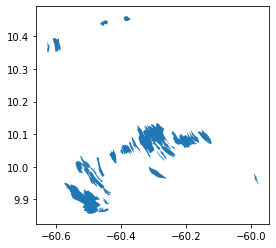

In [8]:
gs_targPoly.plot()

###  Generate Well Concept Data

In [9]:
from dummydatacreator import  GenerateWellConcept # This is not supported in Azure notebooks

In [38]:
num_of_concepts = 30

region_x_min = -60.4
region_x_max = -60.3
region_y_min = 10.02
region_y_max = 10.15
WellConcepts = [GenerateWellConcept(region_x_min, region_x_max, region_y_min, region_y_max) for i in range(num_of_concepts)]

In [39]:
WC_name, WC_points, WC_resource = list(zip(*WellConcepts))

In [40]:
print(WellConcepts[0])

['M-5', [-60.39266461303017, 10.044317220559696], 73.14792567978371]


### Well Concept / Platform Intersection

In [41]:
def ArePointsCloseTogether(pointA, pointB, distance):
    return (euclidean_distances([pointA], [pointB]) <= distance)[0][0]

print(ArePointsCloseTogether([10,2], [0,0], 10))

False


In [42]:
def AreWCsCloseToPlatforom(WellConceptsXY, PlatformXY, distance):    
    return [ArePointsCloseTogether(wcXY, PlatformXY, distance) for wcXY in WellConceptsXY]

In [43]:
def CalculateRankOfWCs(WC, plat, radii):
    '''Well Concepts are ranked according to binned distance from platform
    '''
    radii = np.sort(radii)
    num_radii = len(radii)

    #calculate distances of all well concepts from platform 
    distances = [distance.distance(wc_i, plat) for wc_i in WC] #Karney 2013 distance
    distances = np.reshape(distances,[-1])

    
    #Reverse ranking - where 0 is closest to platform
    revranks = np.digitize(distances, radii, right = False) #i.e. includes left bound = 0

    # Ranking - where 0 is furthest from platform
    ranking = [num_radii - revrank for revrank in revranks]
    
    return ranking

In [44]:
def RankToColors(WC_rank):
    dct_colors = {0: "#E8E8E8",
              1:"#FF8000",
              2:"#00CC00"}
    return dct_colors[WC_rank]

In [45]:
import geopandas as gpd
from shapely.geometry import Point, LineString
from mpl_toolkits.basemap import Basemap


In [46]:
WC_points = [Point(p[0], p[1]) for p in WC_points]
WC_points = gpd.GeoSeries(WC_points)

/Users/Pri.balachandran@ibm.com/opt/anaconda3/envs/py36-GeographicPlotting/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/Users/Pri.balachandran@ibm.com/opt/anaconda3/envs/py36-GeographicPlotting/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()
/Users/Pri.balachandran@ibm.com/opt/anaconda3/envs/py36-GeographicPlotting/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


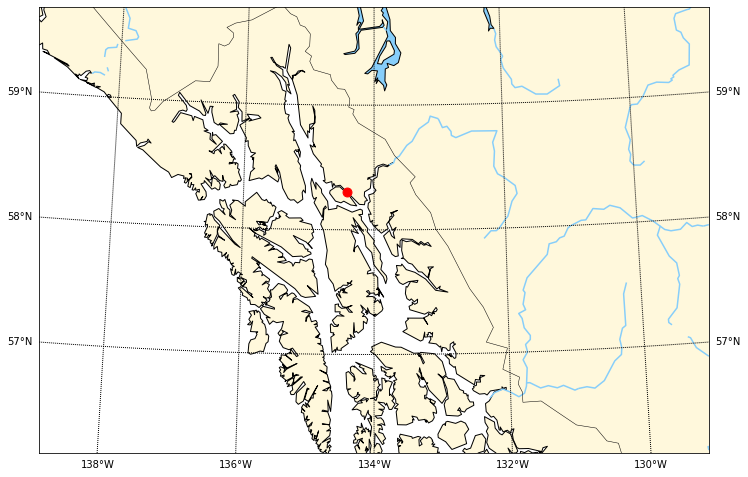

In [47]:
def plot_WC_Platform(WC_Point : Point,WC_name, WC_res: np.array,WC_col, plat_x, plat_y, plat_name, figsize):

    water = 'lightskyblue'
    earth = 'cornsilk'
    juneau_lon, juneau_lat = -134.4167, 58.3

    fig, ax1 = plt.subplots(figsize=(12, 10))
    mm = Basemap(
        width=600000, height=400000,
        resolution='i',
        projection='aea',
        ellps='WGS84',
        lat_1=55., lat_2=65.,
        lat_0=58., lon_0=-134)
    coast = mm.drawcoastlines()
    rivers = mm.drawrivers(color=water, linewidth=1.5)
    continents = mm.fillcontinents(
        color=earth,
        lake_color=water)
    #bound= mm.drawmapboundary(fill_color=water)
    countries = mm.drawcountries()
    merid = mm.drawmeridians(
        np.arange(-180, 180, 2), 
        labels=[False, False, False, True])
    parall = mm.drawparallels(
        np.arange(0, 80), 
        labels=[True, True, False, False])
    x, y = mm(juneau_lon, juneau_lat)
    juneau = mm.scatter(x, y, 80, label="Juneau", color='red', zorder=10)
    
    

c = ["#000000" for i in range(len(WC_name))]
plot_WC_Platform(WC_points, WC_name, WC_resource, c , -60.35,10.12,"plat",(10,10))
    
    

In [78]:
from shapely.ops import transform
from descartes import PolygonPatch
from matplotlib.collections import PatchCollection


/Users/Pri.balachandran@ibm.com/opt/anaconda3/envs/py36-GeographicPlotting/lib/python3.6/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/Pri.balachandran@ibm.com/opt/anaconda3/envs/py36-GeographicPlotting/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


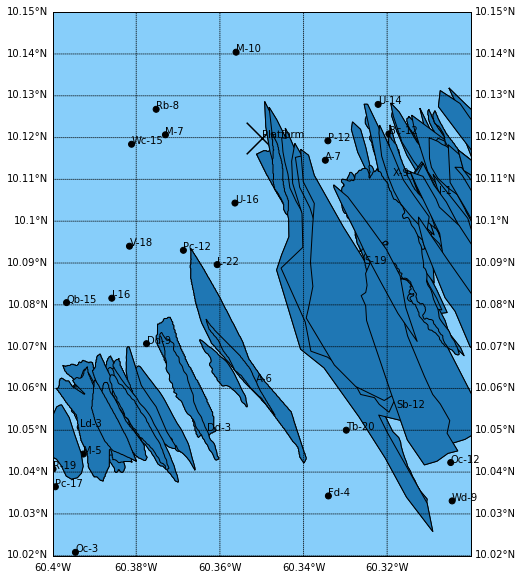

In [79]:
def plot_WC_Platform(WC_Point : Point,WC_name, WC_res: np.array,WC_col, plat_lon, plat_lat, plat_name, figsize):

    lat_min=region_y_min
    lat_max=region_y_max
    lon_min=region_x_min
    lon_max=region_x_max
    
    
    
    water = 'lightskyblue'
    earth = 'cornsilk'

    fig, ax = plt.subplots(figsize=(12, 10))

    mm = Basemap(
        width=6000000, 
        resolution='i',
        epsg=4326,
        llcrnrlon=lon_min,
        llcrnrlat=lat_min,
        urcrnrlon=lon_max,
        urcrnrlat=lat_max,
        lon_0=(lon_min+lon_max)/2,
        lat_0=(lat_min+lat_max)/2)
        

    bound= mm.drawmapboundary(fill_color=water)
    countries = mm.drawcountries()
    
    #i.e. x axis labels
    merid = mm.drawmeridians(
        np.arange(lon_min, lon_max, 0.02), 
        labels=[False, False, False, True])
    
    
    #y axis labels
    parall = mm.drawparallels(
        np.arange(lat_min, lat_max, 0.01), 
        labels=[True, True, False, False])
    
    
    
    #PLATFORM
    mm.scatter(plat_lon, plat_lat, marker='x', s=1000,label='plat', c="#000000")
    #Convert lat long to map xy
    platx, platy = mm(plat_lon, plat_lat)
    ax.annotate(plat_name, (platx, platy))

    
    #WC -x,y needs renaming to lon lat
    mm.scatter(WC_Point.x, WC_Point.y, c=WC_col)
    
    #Well concept labels
    for i, x in enumerate(WC_name):
        wcx, wcy = mm(WC_Point[i].x, WC_Point[i].y)

        ax.annotate(WC_name[i], ([wcx, wcy]), zorder=2)

        
        
        
        
    #POLYGONS
    for poly in gs_targPoly:
        mmpoly = transform(mm, poly)
        patches.append(PolygonPatch(mmpoly))
        
    ax.add_collection(PatchCollection(patches,match_original=True))
    
#    x, y = mm(juneau_lon, juneau_lat)
#    juneau = mm.scatter(x, y, 80, label="Juneau", color='red', zorder=10)
    
    

c = ["#000000" for i in range(len(WC_name))]
plot_WC_Platform(WC_points, WC_name, WC_resource, c , -60.35,10.12,"Platform",(10,10))
    

In [177]:
def CreamMe(plat_x, plat_y, innerradius, outerradius, figsize):

    #Subset the WCs to only those which are on the creaming curve
    WC_rank = CalculateRankOfWCs([(a.x, a.y) for a in WC_points],(plat_x,plat_y),[0, innerradius, outerradius])

    #Construct dataframe of all well concepts
    df_WC = pd.DataFrame({"Well Concept": WC_name,"Resource": WC_resource, "Rank":WC_rank})
    
    #Reduce to df of well concepts on Creaming Curve (i.e. within the radii)
    df_WC_cc = df_WC[df_WC['Rank'] != 0].copy()
    
    
    df_WC_cc.loc[:,'Color'] = df_WC_cc['Rank'].map(lambda x: RankToColors(x))
    
    df_WC_cc.sort_values(by="Resource", inplace=True, ascending=False)
    
    
    

    fig, ax = plt.subplots(figsize=figsize)    

    ax.bar(df_WC_cc['Well Concept'], df_WC_cc['Resource'], color=df_WC_cc['Color'])

    ax.set_xlabel("Well Concept Name")
    ax.set_ylabel("Resource")
    plt.show()






In [178]:
def GetWCColors(WC_Points, plat_x, plat_y, innerradius,outerradius):
    
    #Subset the WCs to only those which are on the creaming curve
    WC_rank = CalculateRankOfWCs([(a.x, a.y) for a in WC_points],(plat_x,plat_y),[0, innerradius, outerradius])

    #Construct dataframe of all well concepts
    df_WC = pd.DataFrame({"Well Concept": WC_name,"Resource": WC_resource, "Rank":WC_rank})
    
   
    return df_WC['Rank'].map(lambda x: RankToColors(x))    

In [133]:
userInputs = [widgets.BoundedFloatText(
    value=round(region_x_min +(random.random()*(region_x_max-region_x_min)), 2 ),
    min=region_x_min,
    max=region_x_max,
    step=0.01,
    description='X:',
    disabled=False
),
widgets.BoundedFloatText(
    value=round(region_y_min +(random.random()*(region_y_max-region_y_min)), 2 ),
    min=region_y_min,
    max=region_y_max,
    step=0.01,
    description='Y:',
    disabled=False
),
  widgets.BoundedFloatText(
    value=10,
    min=0.01,
    max=1000,
    step=1,
    description='Radius:',
    disabled=False
)]



In [134]:
#%matplotlib inline 
from IPython.display import display

output = widgets.Output(layout={'border': '1px solid black'})


def on_button_clicked(event):
    output.clear_output()

    with output:
        plat_x = userInputs[0].value
        plat_y = userInputs[1].value
        radius = userInputs[2].value
        WC_colors = GetWCColors(WC_points,plat_x, plat_y, radius, radius*1.3)
        
        plot_WC_Platform(WC_points, WC_name, WC_resource, WC_colors, plat_x,plat_y,"platform", (12,10))
        CreamMe(plat_x, plat_y, radius,radius*1.3, (5,5))
    
        print("Button clicked.")        
        
button = widgets.Button(
    description='click me',
    layout={'width': '300px'},
    button_style='success', 
    tooltip='Run',
    icon='refresh'
)

display(widgets.Box(userInputs), button)


button.on_click(on_button_clicked)

Box(children=(BoundedFloatText(value=-60.33, description='X:', max=-60.32, min=-60.38, step=0.01), BoundedFloa…

Button(button_style='success', description='click me', icon='refresh', layout=Layout(width='300px'), style=But…

In [135]:
output

Output(layout=Layout(border='1px solid black'))